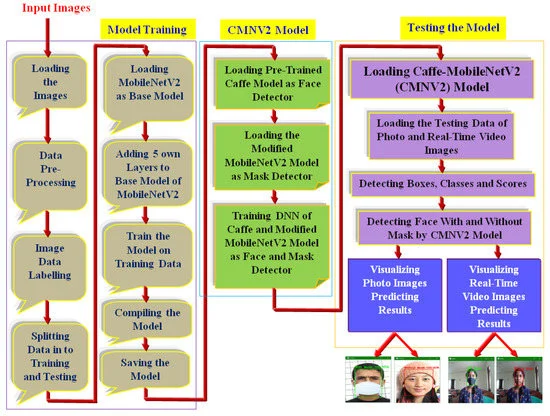

In [1]:
import numpy as np 
import cv2 
import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [2]:
model=keras.models.load_model('face_model.h5')
def Prediction(image):
    class_names=['MASK','NO MASK']
    image=preprocess_input(image)
    predictions=model.predict([image])
    N=np.argmax(predictions,axis=1)
    return class_names[int(N)]

In [3]:
configFile="deploy.prototxt"
modelFile="res10_300x300_ssd_iter_140000.caffemodel"
faceNet= cv2.dnn.readNet(modelFile,configFile)
def detectionFace(frame):
    Face_location=[]
    Face_pred=[]
    frameHeight,frameWidth,_=frame.shape
    blob=cv2.dnn.blobFromImage(frame, 1.0, (224,224), [104, 177, 123])
    faceNet.setInput(blob)
    detections=faceNet.forward()
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            Face_location.append([x1,y1,x2,y2])
            image=frame[y1:y2,x1:x2]
            image=cv2.resize(image,(224,224))
            image = np.expand_dims(image, axis=0)
            Face_pred.append(Prediction(image))
    return Face_pred,Face_location

In [4]:
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 700)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 700)
while True:
    ret,frame=cap.read()
    if ret:
        pred,location=detectionFace(frame)
        print('number of face = ',len(pred))
        for i in range(len(location)):
            color=[0,255,0]
            if pred[i]=='NO MASK':
                color=[0,0,255]
            x1,y1,x2,y2=location[i]
            cv2.rectangle(frame,(x1, y1),(x2, y2),color,2)
            cv2.putText(frame,pred[i],(x1+5,y1+15),cv2.FONT_HERSHEY_TRIPLEX,.5,color,1)
            cv2.rectangle(frame,(x1, y1),(x2, y1+20),color,2)
        cv2.imshow('Frame',frame)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 6s 6s/step
number of face =  1
1/1 [==============================] - 0s 152ms/step
number of face =  1
1/1 [==============================] - 0s 43ms/step
number of face =  1
1/1 [==============================] - 0s 45ms/step
number of face =  1
1/1 [==============================] - 0s 47ms/step
number of face =  1
1/1 [==============================] - 0s 64ms/step
number of face =  1
1/1 [==============================] - 0s 41ms/step
number of face =  1
1/1 [==============================] - 0s 48ms/step
number of face =  1
1/1 [==============================] - 0s 42ms/step
number of face =  1
1/1 [==============================] - 0s 39ms/step
number of face =  1
1/1 [==============================] - 0s 49ms/step
number of face =  1
1/1 [==============================] - 0s 44ms/step
number of face =  1
1/1 [==============================] - 0s 40ms/step
number of face =  1
1/1 [==============================] - 0s 47ms/step
number of fac